# Linear Regression data science project
The data and problem statement for this project were provided in the [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) by Jose Portilla on Udemy.

**Problem Statement** <br><br>
The data is provided by a retail store, they want to find out where they should be focusing efforts in order to maximise sales
<br>
This is a set of dummy data with no real personal information

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

custom_style = {'axes.titlesize':'15',
                'axes.titlecolor':'white',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set(style= 'darkgrid', rc=custom_style)

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()
# There are 8 columns with 500 rows and no missing data 
# The predictor column will be Yearly Amount Speant 
# With scalar inputs Avg Session Lenght, Time on App, Time on Website, Length of Membership

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


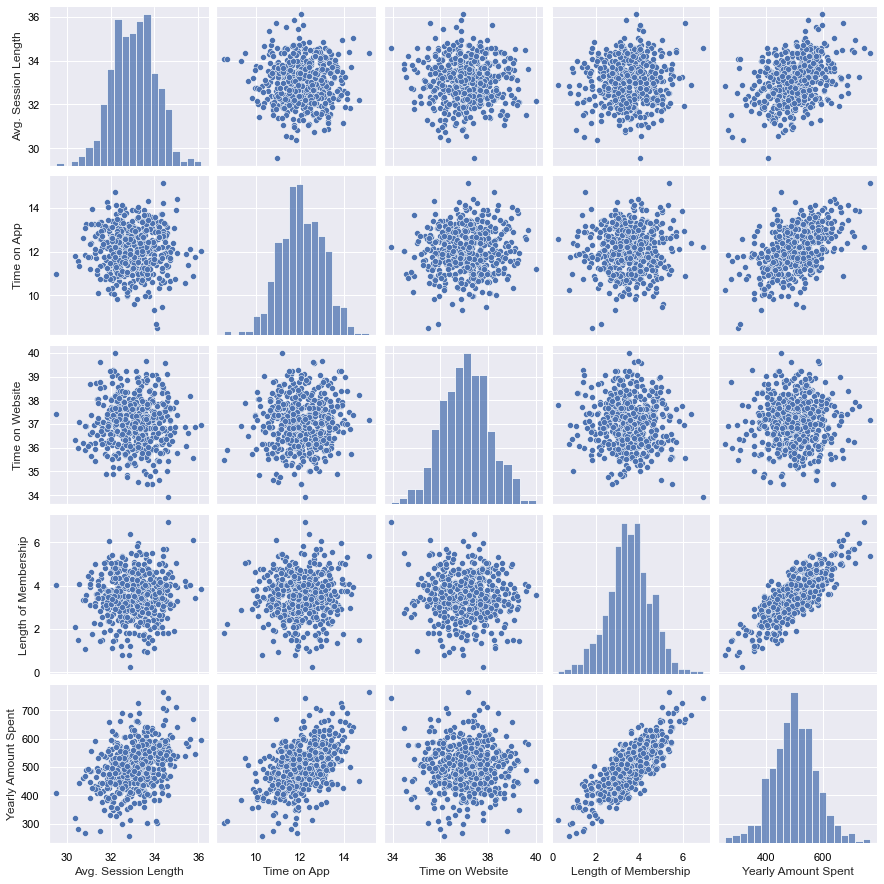

In [6]:
sns.pairplot(customers)

##### Observation 
Visually there appears to be a strong trend between the Length of Membership and the Yearly Amount Spent. There's some suggestion of correlation between Yearly Amount Spent with the Time on App and Average Session Length as well

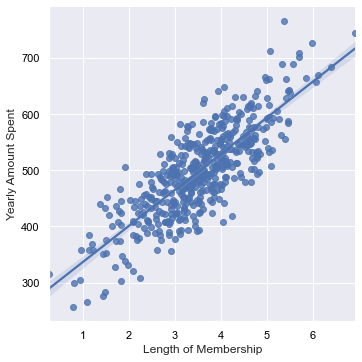

In [7]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
# Closer look at the linear plot between Lenght of Membership and Yearly Amount Spent columns 
# confirms observations. Further supported by the narrow error bars on the best fit line 

In [8]:
# train and test datasets
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'predictions')

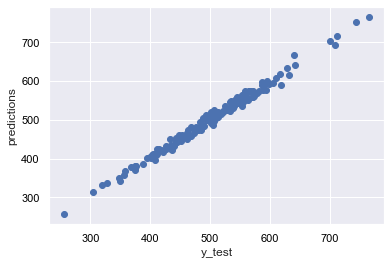

In [13]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
# The almost perfectly linear relationship between the predicted and test dataset boosts
# confidence in the accuracy of the model

In [14]:
from sklearn import metrics

# Using metrics to further assess accuracy of model 
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print ('MSE: ', metrics.mean_squared_error(y_test,predictions))
print ('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7.2281486534308295
MSE:  79.8130516509743
RMSE:  8.933815066978626


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/Users/livernteo/Documents/lvt_projects/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

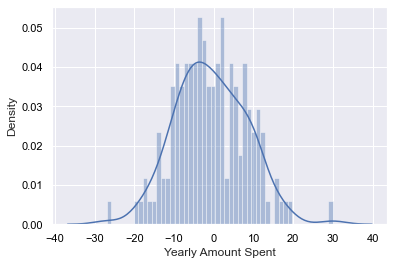

In [15]:
# Plotting the residuals (y_test - predictions) on a histogram
sns.distplot(y_test-predictions,bins=50)
# The normally distributed residuals is a good sign; it shows that most of our residuals 
# are centered around smaller values (-10 -> 10) with few outliers

In [16]:
# visualising the coefficients in a df
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients

,0
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Responding to the company 
By analysing the coefficient of the good fitting model, we can see which one of these factors most impact the Yearly Amount Spent. The length of membership was the most strongly correlated feature, followed by Time on App, Avg. Session Length and Time on Website trailling very far behind. If the company was looking to boost sales, they should really be focusing on encouraging members to be subscribed for longer periods of time. This can be done through schemes such as loyalty rewards, or by enhancing features on the mobile app to improve the customer experience and increase session lengths.